In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import time


%matplotlib inline

# Main function:

In [2]:
def SetUpMap (size, per, seed=None):    
    if (seed == -1):
        return np.array([[ int(i == size // 2 and j == size // 2) for i in range(size)] for j in range(size)])
    elif (seed != None):
        np.random.seed(seed)
    
    return np.array([[ int(np.random.randint(0, 100) < per) for i in range(size)] for j in range(size)])

In [3]:
def GetScore (field, b, i, j):  
    n = len(field)
    offset = np.arange(-1, 2, 1)
    neighbors = 1 - field[ (i + offset.reshape(3, -1)) % n, (j + offset) % n ]
    
    if (field[i, j] == 1): # Defectors 
        return np.sum(neighbors, dtype=np.int) * b
    else:                  # Cooperators
        return np.sum(neighbors, dtype=np.int)

In [4]:
def GetBestStategy (field, scores, i, j):
    n = len(field)
    offset = np.arange(-1, 2, 1)
    neighborsScores = scores[(i + offset.reshape(3, -1)) % n, (j + offset) % n]
    
    #k = neighborsScores.argmax(axis=0) - 1
    k = neighborsScores.argmax()
    x = k // 3
    y = k % 3
    
    return field[ (x+i-1)%n, (y+j-1)%n ]

In [5]:
def NextGen (field, b):
    n = len(field)
    
    scores = np.array([[GetScore(field, b, i, j) for j in range(n)] for i in range(n)])
    
    return np.array([[GetBestStategy(field, scores, i, j) for j in range(n)] for i in range(n)])

In [15]:
class GameField:
    _b = 0
    _size = 0
    field = np.array([])
    
    def __init__(self, size, b):
        _size = size
        _b = b
        
    def evolve(self, steps=1):
        for i in range(steps):
            self.field = NextGen(self.field, self._b)

In [18]:
def calculate_density(size, percentage=10, tries=1, start=1, end=2, step=0.05, evol=100):
    
    b_points = np.arange(start, end, step)

    #densities = np.array([0.0 for b in b_points])
    densities = np.array([])
    
    for i in range(tries):
        random.seed(i)
        instance = np.array(random.rand(size, size) > 0.01 * percentage, dtype=int)

        density = np.array([])

        print("\n" + str(i) + " >", end="")
        for b in b_points:
            game = GameField(size, b)
            game.field = np.copy(instance)

            game.evolve(evol)
            print("*", end="")
            density = np.append(density, [[(np.count_nonzero(1 - game.field) / size**2)]])


        densities = np.append(densities, density)

    return densities.reshape(tries, -1)

# Main program:

In [21]:
calculate_density(210, step=0.02, evol=250, tries=10)


0 >

KeyboardInterrupt: 

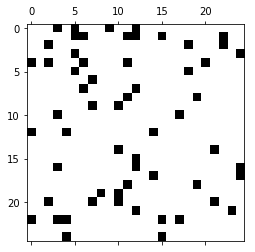

In [16]:
b = 1.81
size = 25
field = SetUpMap(size, 10, 1)

plt.spy(field)

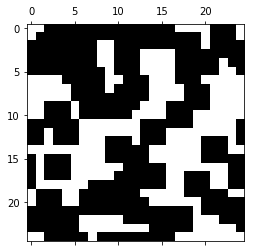

In [17]:
field = NextGen (field, b)

plt.spy(field)